In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
true['label']=0
fake['label']=1

In [4]:
df = pd.concat([true,fake],axis=0).reset_index(drop=True)

In [5]:
df=df.sample(frac = 1,random_state = 42).reset_index(drop = True)

In [6]:
df.head()

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",1
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",1
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",1
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",0
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",1


In [7]:
df.tail()

,title,text,subject,date,label
44893,Nigeria says U.S. agrees delayed $593 million ...,ABUJA (Reuters) - The United States has formal...,worldnews,"December 27, 2017",0
44894,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,Middle-east,"June 29, 2016",1
44895,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,Government News,"Feb 27, 2016",1
44896,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",0
44897,U.N. refugee commissioner says Australia must ...,SYDNEY (Reuters) - The U.N. High Commissioner ...,worldnews,"November 1, 2017",0


In [8]:
X = df['text'].fillna('')

In [9]:
y = df['label']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7)

In [14]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [15]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter = 50)

In [16]:
model.fit(X_train_vec,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [18]:
import seaborn as sns

In [19]:
import matlplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matlplotlib'

In [20]:
!pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import matplotlib.pyplot as plt

In [22]:
y_pred = model.predict(X_test_vec)

In [23]:
print(f"Accuracy : {accuracy_score(y_test,y_pred) * 100: .2f}%")

Accuracy :  99.42%


In [24]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

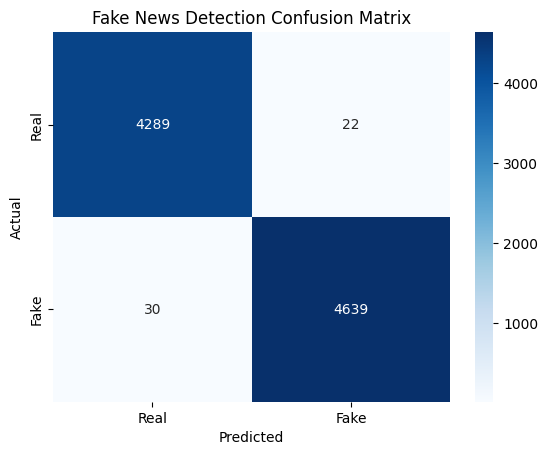

In [25]:
sns.heatmap(cm,annot=True,fmt = 'd',cmap = 'Blues' ,xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Fake News Detection Confusion Matrix')
plt.show()

In [26]:
def predict_news(text):
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)[0]
    return "Fake News" if prediction == 1 else "Real News"
print(predict_news("Scientists discovered wateer on Mars"))

Fake News


In [28]:
import joblib
joblib.dump(model,"fake_news_model.pkl")

['fake_news_model.pkl']

In [30]:
joblib.dump(vectorizer,"vectorizer.pkl")

['vectorizer.pkl']

In [31]:
print(predict_news("Scientists discover life on earth"))

Fake News


In [33]:
print(predict_news("Life on earth is possible"))

Fake News


In [34]:
import os
os.getcwd()

'C:\\Users\\santh\\fake news detector'